<a href="https://colab.research.google.com/github/Mwikali-5/Predictive/blob/main/Project_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Classification Project:**

**The project should have the following:**

**1. Model features and preprocessing approaches**
**2. Different kinds of models (logistic regression, k-nearest neighbors, decision trees, etc.)**
**3. Different model hyperparameters**


**At minimum three models must be built:**
**1. Simple baseline model, in this case I will choose logistic regression**
**2. A complex model....random forest and XGBoost**
**3. Different model hyperparameters, so this means a grid search**


**For this project my target variable will be seasonal_vaccine so we are going to drop all the h1n1 variables since we will not be working with them.**

**Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both.**

# **Phase 3 Supervised Learning Project**

# **Assessment Question**

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether. 
Using data from Taarifa and the Tanzanian Ministry of Water to do the following: 

Build a classifier model to predict the condition of the water pumps.

# **Implementation**

# 1. Defining the Question

# a) Specifying the Question

Build a classifier model to predict the condition of the water pumps.

# b)Defining the Metric for Success

To predict whether or not the water pumps are functional, need repairs or do not worl at all with an accuracy of at least 75%

# c) Understanding the context

The dataset gives information about water pumps that are used to provide water to the citizens of Tanzania. The government want to know which pumps are not doing well so that they can build well that are fully functional. 
The aim is to predict the operating condition of a waterpoint for each record in the dataset.

# d) Recording the Experimental Design

1. Importing the libraries
2. Reading the data
3. Data Wrangling
4. Exploratory data analysis
5. Data preprocessing
6. Supervised Learning
7. Conclusions

# e) Data Description

1. amount_tsh - Total static head (amount water available to waterpoint).
2. date_recorded - The date the row was entered.
3. funder - Who funded the well.
4. gps_height - Altitude of the well
5. installer - Organization that installed the well
6. longitude - GPS coordinate
7. latitude - GPS coordinate)
8. wpt_name - Name of the waterpoint if there is one
9. num_private - is it private
10. basin - Geographic water basin
11. dsubvillage - Geographic location
12. region - Geographic location
13. region_code - Geographic location (coded)
14. district_code - Geographic location (coded)
15. lga - Geographic location
16. ward - Geographic location
17. population - Population around the well
18. public_meeting - True/False.
19. recorded_by - Group entering this row of data
20. scheme_management - Who operates the waterpoint.
21. scheme_name - Who operates the waterpoint.
22. permit - If the waterpoint is permitted.
23. construction_year - Year the waterpoint was constructed.
24. extraction_type - The kind of extraction the waterpoint uses.
25. extraction_type_group - The kind of extraction the waterpoint uses.
26. extraction_type_class - The kind of extraction the waterpoint uses.
27. management - How the waterpoint is managed.
28. management_group - How the waterpoint is managed.
29. payment - What the water costs.
30. payment_type - What the water costs.
31. water_quality - The quality of the water.
32. quality_group - The quality of the water.
33. quantity - The quantity of water.
34. quantity_group - The quantity of water.
35. source - The source of the water.
36. source_type - The source of the water.
37. esource_class - The source of the water.
38. waterpoint_type - The kind of waterpoint.
39. waterpoint_type_group - The kind of waterpoint.

# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Reading Data**

In [31]:
#Loading the data
#The data is composed of three files, training_features, test_featues and training_set_labels

#data processing:

train_features = pd.read_csv("/content/train.csv", sep=',', index_col = 'id')  #features are the X variable in simple linear regression
train_labels = pd.read_csv("/content/train-labels.csv", sep=',', index_col = 'id')    #labels are the Y variable in simple linear regression

# **Data Exploration**

In [32]:
#Preview of the train_features dataset

train_features.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [33]:
#Preview of the tail train_features dataset
train_features.tail()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,Wami / Ruvu,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [34]:
#Preview of the train_labels dataset

train_labels.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


In [35]:
#Preview of the tail train_labels dataset

train_labels.tail()


,status_group
id,
60739,functional
27263,functional
37057,functional
31282,functional
26348,functional


In [37]:
#confirm if the id in features and labels are the same to join the two into a single dataframe

assert train_features.index.equals(train_labels.index)

In [39]:
#Join the two for ease in data wrangling

data = train_features.merge(train_labels, how = 'inner', on = 'id')
data

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional


In [40]:
#Checking the number of rows and columns
data.shape

(59400, 40)

In [41]:
#Checking columns and their datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

# **Data Wrangling**

In [42]:
#Checking for anomalies
#iterating through all columns for unique values in the dataset

for i in data.columns:
  #to print a line in between columns
  print('\n')
  print(data[i].unique())



[6.00e+03 0.00e+00 2.50e+01 2.00e+01 2.00e+02 5.00e+02 5.00e+01 4.00e+03
 1.50e+03 6.00e+00 2.50e+02 1.00e+01 1.00e+03 1.00e+02 3.00e+01 2.00e+03
 4.00e+02 1.20e+03 4.00e+01 3.00e+02 2.50e+04 7.50e+02 5.00e+03 6.00e+02
 7.20e+03 2.40e+03 5.00e+00 3.60e+03 4.50e+02 4.00e+04 1.20e+04 3.00e+03
 7.00e+00 2.00e+04 2.80e+03 2.20e+03 7.00e+01 5.50e+03 1.00e+04 2.50e+03
 6.50e+03 5.50e+02 3.30e+01 8.00e+03 4.70e+03 7.00e+03 1.40e+04 1.30e+03
 1.00e+05 7.00e+02 1.00e+00 6.00e+01 3.50e+02 2.00e-01 3.50e+01 3.06e+02
 8.50e+03 1.17e+05 3.50e+03 5.20e+02 1.50e+01 6.30e+03 9.00e+03 1.50e+02
 1.20e+05 1.38e+05 3.50e+05 4.50e+03 1.30e+04 4.50e+04 2.00e+00 1.50e+04
 1.10e+04 5.00e+04 7.50e+03 1.63e+04 8.00e+02 1.60e+04 3.00e+04 5.30e+01
 5.40e+03 7.00e+04 2.50e+05 2.00e+05 2.60e+04 1.80e+04 2.60e+01 5.90e+02
 9.00e+02 9.00e+00 1.40e+03 1.70e+05 2.20e+02 3.80e+04 2.50e-01 1.20e+01
 6.00e+04 5.90e+01]


['2011-03-14' '2013-03-06' '2013-02-25' '2013-01-28' '2011-07-13'
 '2011-03-13' '2012-10-01' '2012-1

From this we can see that there are no anomalies present in the dataset.

In [43]:
#Checking the datatypes

data.dtypes


amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_qual

In [46]:
#checking for duplicates

data.duplicated().sum()

36

In [44]:
#Checking for null values
data.isnull().sum()/len(data)*100

amount_tsh                0.000000
date_recorded             0.000000
funder                    6.119529
gps_height                0.000000
installer                 6.153199
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.000000
num_private               0.000000
basin                     0.000000
subvillage                0.624579
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.612795
recorded_by               0.000000
scheme_management         6.526936
scheme_name              47.417508
permit                    5.144781
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group          0.000000
payment             

Some columns are similar so we will keep one and drop the rest.

In [ ]:
#dropping irrelevant columns
data.drop

# **Exploratory Data Analysis**

# **a) Univariate**

In [ ]:
data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,13353.000000,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,6676.500000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,13353.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,20029.500000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,26706.000000,1.000000,1.000000


a) Univariate

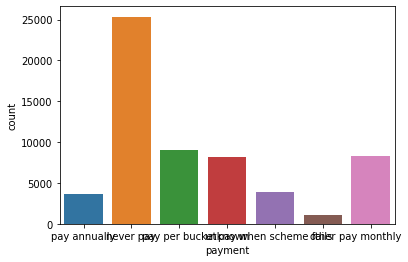

In [47]:
sns.countplot(data=data, x='payment')

Most of the people who participated in the survey are in the 65+ age group.

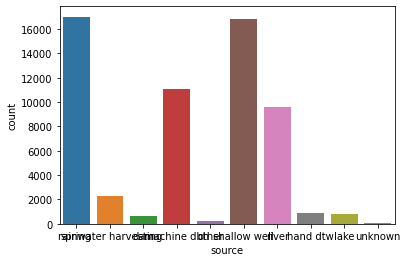

In [48]:
#countplot for the people who got seasonal_vaccine, 0 = did not get vaccine, 1 = people who got the vaccine
sns.countplot(data=data, x='source')

Most people who took the survey did not get the vaccine

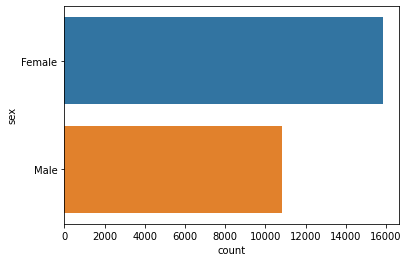

In [ ]:
#Count plot of sex
sns.countplot(data=data, y='sex', order = data.sex.value_counts().index)

The dataset has more females than males.

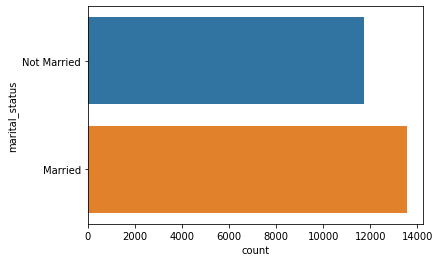

In [ ]:
sns.countplot(data=data, y='marital_status')

The dataset has more married people than not married

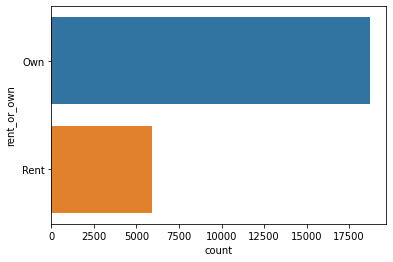

In [ ]:
sns.countplot(data=data, y='rent_or_own')

More people have their own homes than those who rent.

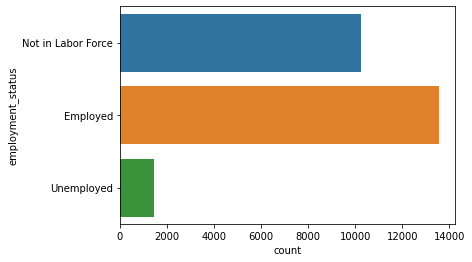

In [ ]:
sns.countplot(data=data, y='employment_status')

Most people in the dataset are employed.

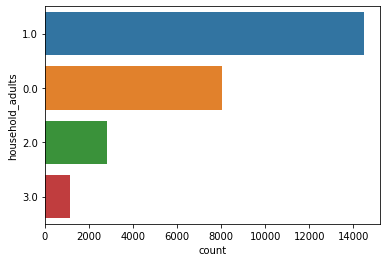

In [ ]:
sns.countplot(data=data, y='household_adults', order=data.household_adults.value_counts().index)

Most househoulds have one adult in the dataset.

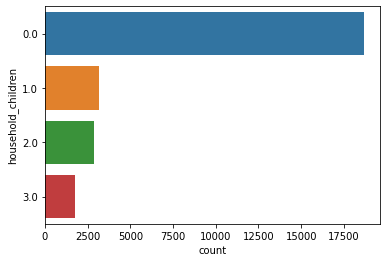

In [ ]:
sns.countplot(data=data, y='household_children', order=data.household_children.value_counts().index)

Most households do not have children in the dataset.

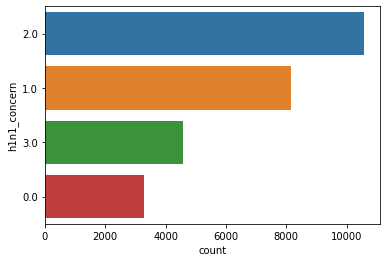

In [ ]:
sns.countplot(data=data, y='h1n1_concern', order=data.h1n1_concern.value_counts().index)

Most of the respondents are somewhat concerned about the H1N1 flu

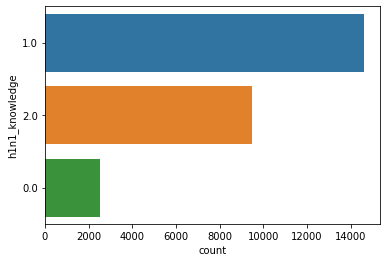

In [ ]:
sns.countplot(data=data, y='h1n1_knowledge', order=data.h1n1_knowledge.value_counts().index)

Most of the respondents have a little knowledge about the H1N1 flu

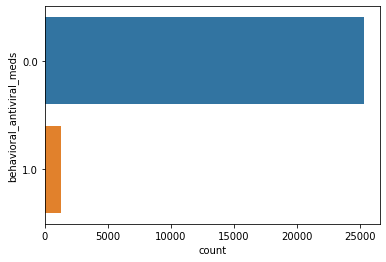

In [ ]:
sns.countplot(data=data, y='behavioral_antiviral_meds')

Most of the respondents have not taken antiviral medications.

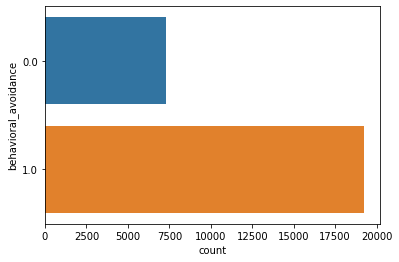

In [ ]:
sns.countplot(data=data, y='behavioral_avoidance')

Most of the respondents have avoided close contact with others with flu like symptoms.

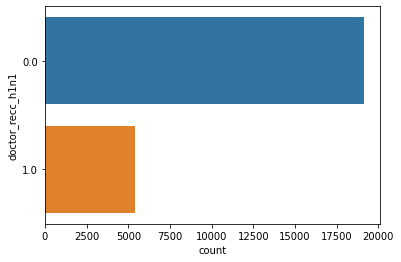

In [ ]:
sns.countplot(data=data, y='doctor_recc_h1n1')

Most of the respondents have not been recommended the H1N1 flu vaccine by a doctor.

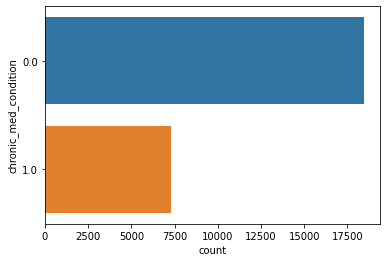

In [ ]:
sns.countplot(data=data, y='chronic_med_condition')

Most of the respondents are not taking any chronic medication nor do they have any chronic illness.

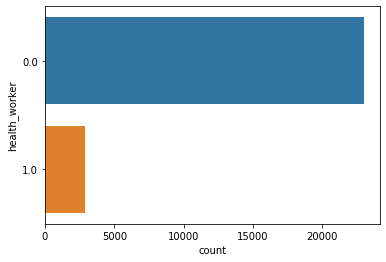

In [ ]:
sns.countplot(data=data, y='health_worker')

Most of the respondents are not health workers

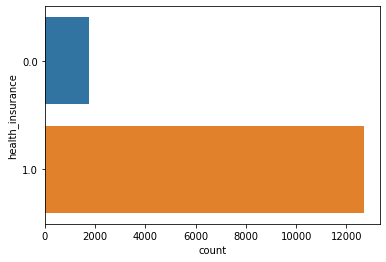

In [ ]:
sns.countplot(data=data, y='health_insurance')

Many of the respondents have health insurance

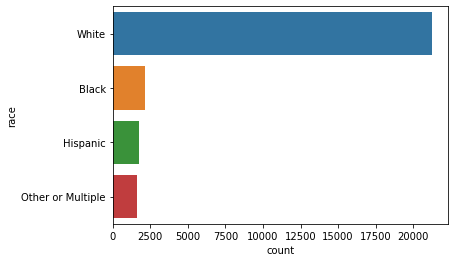

In [18]:
sns.countplot(data=data, y='race', order=data.race.value_counts().index)

Most of the respondents are white.

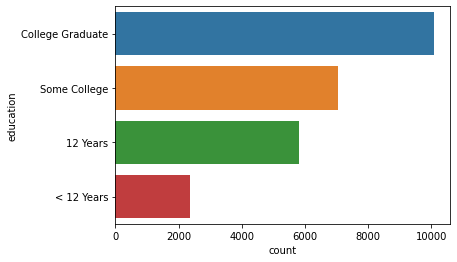

In [19]:
sns.countplot(data=data, y='education', order=data.education.value_counts().index)

Most of the respondents are college graduates.

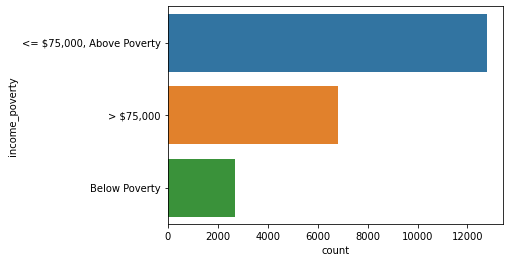

In [20]:
sns.countplot(data=data, y='income_poverty', order=data.income_poverty.value_counts().index)

Most of the respondents have a household annual income of less than 75,000 dollars

# **b) Bivariate**

In [ ]:
data.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'respondent_id', 'h1n1_vaccine',
       'seasonal_vaccine'],
      dtype='object')

There are 36 features(columns) in the training set
There are 3 columns in the target file. Since we are working with seasonal file, we can drop the h1n1 column

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [ ]:
X.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
#checking for nulls
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [ ]:
df['seasonal_vaccine'].value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


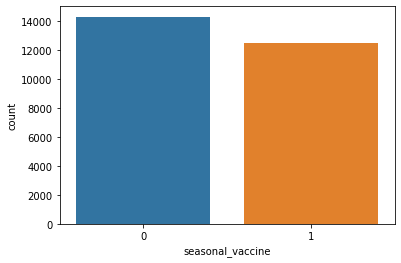

In [ ]:
#since we are working with to determine how many people got the seasonal flu, we will drop the h1n1 vaccine
import seaborn as sns
sns.countplot('seasonal_vaccine',data=Y)

In [ ]:
#12435 people received the seasonal_vaccine. We want to check if they were correctly classified

In [ ]:
training_features_data.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [ ]:
# Data_visual=pd.concat([X, Y], axis=1)
df["count"]=1

In [ ]:
def to_matrix(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]